In [1]:
import math

In [2]:
def L(x: float) -> float:
    return math.lgamma(x + 1.0)

In [3]:
def r(x: float) -> float:
    return math.log(L(x), x)

In [4]:
from typing import Callable
import sys


def derivative_at(f: Callable[[float], float], x: float) -> float:
    h = math.sqrt(sys.float_info.epsilon)
    return (f(x + h) - f(x - h)) / (h * 2)


def root(f: Callable[[float], float], x0: float,
         tolerance: float = 1e-8, iteration: int = 10 ** 5) -> float:
    for _ in range(iteration):
        print(x0)
        x0 -= f(x0) / derivative_at(f, x0)
        if math.isclose(x0, 0, abs_tol=tolerance):
            break
    return x0

# main logic


def r_prime(x: float) -> float:
    return derivative_at(r, x)


# root(r_prime, 2)

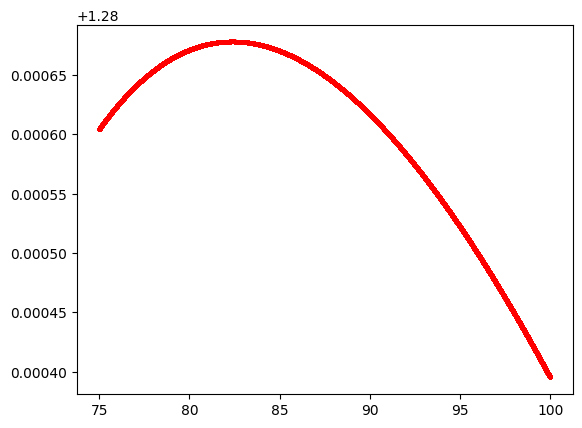

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# use numpy vectorization to parallelize the `r` function
r_array = np.vectorize(r)
r_prime_array = np.vectorize(r_prime)
x = np.linspace(75, 100, 10 ** 5)
y = r_array(x)

plt.plot(x, y, "ro", markersize = 2)

In [6]:
r(10 ** 10)

1.134293269563477

In [7]:
from typing import Callable
import sys

h = math.sqrt(sys.float_info.epsilon);

def derivative_at(f: Callable[[float], float], x: float) -> float:
    global h
    return (f(x + h) - f(x - h)) / (h * 2)

def root(f: Callable[[float], float], x0: float, 
         tolerance: float =  1e-8, iteration: int = 10 ** 5) -> float:
    for _ in range(iteration):
        print(x0)
        x0 -=  (f(x0) / derivative_at(f, x0))
        if math.isclose(x0, 0, abs_tol=tolerance):
            break
    return x0

# main logic
def r_prime(x: float) -> float:
    return (derivative_at(L, x) / L(x) * math.log(x) - L(x) / x) 
root(r_prime, 6)

6
5.240046167717126
4.757779365022033
5.556203679704985
15.891954016155246
21.585974047191943
22.899978851594064
-18.867963668590548


ValueError: math domain error

In [ ]:
h = math.sqrt(sys.float_info.epsilon)
h

1.4901161193847656e-08

In [8]:
def P(x: float) -> float:
    return math.log(math.pi * 2) + math.log(x) * (x + 0.5) - x


def q(x: float) -> float:
    return math.log(P(x), x)

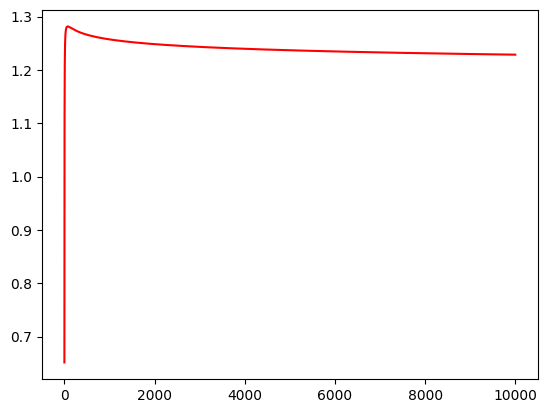

In [10]:
q_array = np.vectorize(q)

x = np.linspace(2, 10 ** 4, 10 ** 5)
y = q_array(x)

plt.plot(x, y, "r", markersize=1)

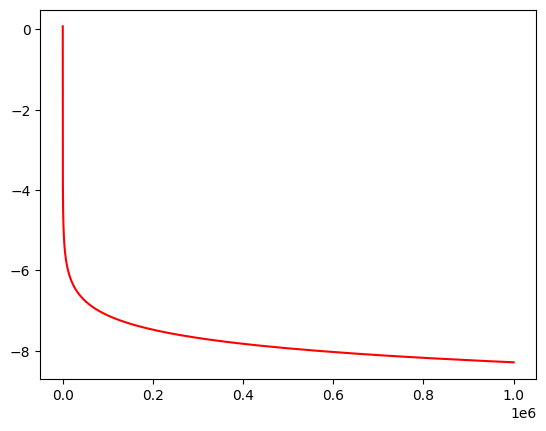

In [14]:
def d(x: float) -> float:
    return math.log10(abs(r(x) - q(x)))


d_array = np.vectorize(d)

x = np.linspace(2, 10 ** 6, 10 ** 7)
y = d_array(x)

plt.plot(x, y, "r", markersize=1)